In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [83]:
os.chdir("C:/Users/RAM1/Desktop/DSP") #change directory or to set the path 

In [84]:
bank=pd.read_csv("bank.csv")

In [85]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [86]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [87]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

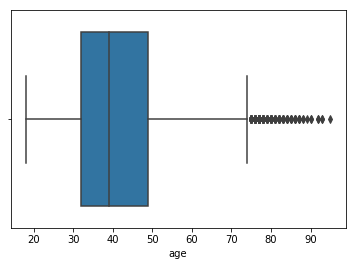

In [88]:
g=sns.boxplot(x=bank["age"])

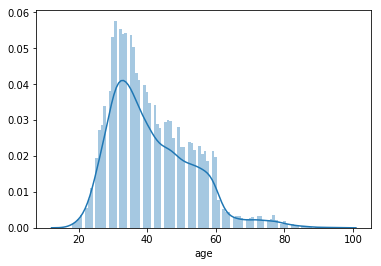

In [89]:
sns.distplot(bank.age,bins=100)

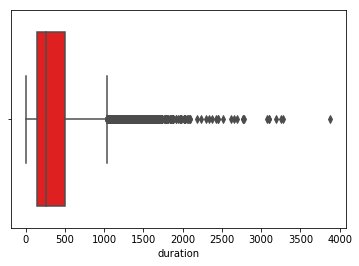

In [90]:
g=sns.boxplot(x=bank["duration"],color="red")

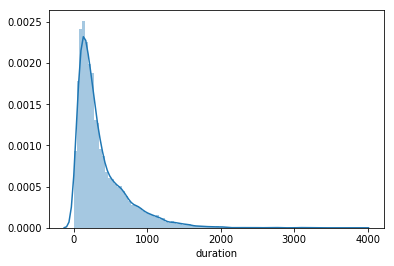

In [91]:
sns.distplot(bank.duration,bins=100)

In [92]:
#remove th outliers from the graph

In [93]:
bank=bank.drop(["day","month","pdays","contact"],axis=1)

In [94]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,0,unknown,yes


In [95]:
bank_data=bank #Creating duplicate copy of bank data

In [96]:
one_hot_data = pd.get_dummies(bank_data[['job','marital','education','default','housing','loan','poutcome']],drop_first=True)
one_hot_data.iloc[0:5,10:15]
one_hot_data.loc[0:5,["job_unknown","marital_single"]] 

,job_unknown,marital_single
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1


In [97]:

x= bank_data[["age","duration","campaign","previous","balance"]]
x=pd.concat([x,one_hot_data],axis=1)


y=bank_data["deposit"]
print(x.shape)
print(y.shape)

(11162, 27)
(11162,)


In [98]:
from sklearn import model_selection
validation_size=0.40

seed=6
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size= validation_size,random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6697, 27)
(6697,)
(4465, 27)
(4465,)


In [99]:
#create tree object
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=tree.DecisionTreeClassifier(criterion="gini")
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
#predicted_dt=model.predict(x_test)

In [101]:
#It will compare with actual and predicted
#predicted_dt=pd.DataFrame(predicted_dt)
#predicted_dt=pd.concat([y_test,predicted_dt],axis=1)
#predicted_dt.head(10)

In [102]:
predicted_dt=[]
predicted_dt=model.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted_dt,y_test))

from sklearn.metrics import accuracy_score

accuracy=round(accuracy_score(predicted_dt,y_test)*100,2)
print("Accuracy of this model is ",accuracy,"%")

[[1773  680]
 [ 585 1427]]
Accuracy of this model is  71.67 %


In [121]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

model_rand=RandomForestClassifier(n_estimators=100)
model_rand.fit(x_train,y_train)

predicted_rand=model_rand.predict(x_test)

from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted_rand,y_test))

from sklearn.metrics import accuracy_score

accuracy=round(accuracy_score(predicted_rand,y_test)*100,2)
print("Accuracy of this model is ",accuracy,"%")

[[1937  414]
 [ 421 1693]]
Accuracy of this model is  81.3 %


In [147]:
from sklearn.neighbors import KNeighborsClassifier
#models_knn=[]
#models_knn.append(("KNN",KNeighborsClassifier()))


from sklearn import metrics
k_range=(1,3,5,7,9,11,13,15,29,31,33,35,37,39,41)

#scores={}
score_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))
    accuracy_knn=round(accuracy_score(y_pred, y_test)*100,2)
    print("for k= ",k,"The accuracy is: " ,accuracy_knn,"%")

for k=  1 The accuracy is:  68.53 %
for k=  3 The accuracy is:  70.86 %
for k=  5 The accuracy is:  71.56 %
for k=  7 The accuracy is:  72.43 %
for k=  9 The accuracy is:  72.72 %
for k=  11 The accuracy is:  72.79 %
for k=  13 The accuracy is:  72.59 %
for k=  15 The accuracy is:  73.03 %
for k=  29 The accuracy is:  73.51 %
for k=  31 The accuracy is:  73.35 %
for k=  33 The accuracy is:  73.28 %
for k=  35 The accuracy is:  73.48 %
for k=  37 The accuracy is:  73.75 %
for k=  39 The accuracy is:  73.64 %
for k=  41 The accuracy is:  73.95 %


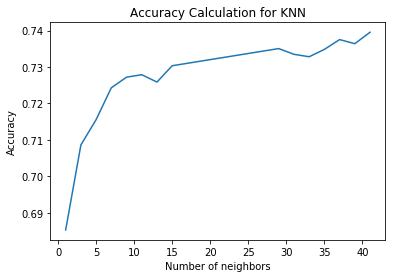

In [142]:
%matplotlib inline  #to draw line 
plt.plot(k_range,score_list)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy Calculation for KNN")
plt.show()

In [106]:
x=bank_data.drop(["deposit"],axis=1)
y=bank_data["deposit"]

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=0)

In [108]:
xtrain.shape

(7441, 12)

In [109]:
xtest.shape

(3721, 12)